In [0]:
import urllib.request
stringInURL = "https://www.gutenberg.org/files/236/236-0.txt"
urllib.request.urlretrieve(stringInURL, "/tmp/alex.txt")

Out[10]: ('/tmp/alex.txt', <http.client.HTTPMessage at 0x7fb542de6c70>)

In [0]:
dbutils.fs.mv("file:/tmp/alex.txt", "dbfs:/data/alex.txt")

Out[11]: True

In [0]:
JungleBook_RDD = sc.textFile("dbfs:/data/alex.txt")

In [0]:
wordsRDD = JungleBook_RDD.flatMap(lambda line : line.lower().strip().split(" "))

In [0]:
import re
CleanTokensRDD = wordsRDD.map(lambda letter: re.sub(r'[^A-Za-z]', '', letter))

In [0]:
from pyspark.ml.feature import StopWordsRemover
remover = StopWordsRemover()
stopwords = remover.getStopWords()
CleanWordsRDD = CleanTokensRDD.filter(lambda PointLessW: PointLessW not in stopwords)

In [0]:
RemoveEmptyRDD = CleanWordsRDD.filter(lambda x: x != "")

In [0]:
KeyValuePairsRDD = RemoveEmptyRDD.map(lambda word: (word,1))

In [0]:
WordCountRDD = KeyValuePairsRDD.reduceByKey(lambda acc, value: acc + value)

In [0]:
JungleBookFinal = WordCountRDD.map(lambda x: (x[1], x[0])).sortByKey(False).take(15)
print(JungleBookFinal)

[(430, 'said'), (230, 'little'), (202, 'mowgli'), (169, 'one'), (128, 'jungle'), (128, 'head'), (120, 'back'), (118, 'go'), (112, 'never'), (111, 'bagheera'), (110, 'big'), (108, 'like'), (107, 'come'), (104, 'man'), (99, 'time')]

Out[20]:

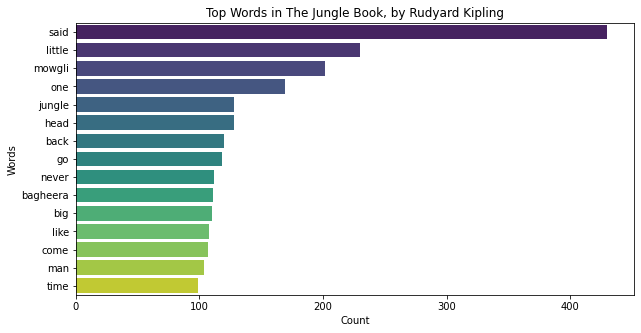

Text(0.5, 1.0, 'Top Words in The Jungle Book, by Rudyard Kipling')

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

source = 'The Jungle Book, by Rudyard Kipling'
title = 'Top Words in ' + source
xlabel = 'Count'
ylabel = 'Words'

df = pd.DataFrame.from_records(JungleBookFinal, columns =[xlabel, ylabel]) 
plt.figure(figsize=(10,5))
sns.barplot(xlabel, ylabel, data=df, palette="viridis").set_title(title)

In [0]:
pip install wordcloud

Python interpreter will be restarted.
Requirement already satisfied: wordcloud in /local_disk0/.ephemeral_nfs/envs/pythonEnv-1436d855-9829-47c4-8476-96772d9592d4/lib/python3.8/site-packages (1.8.1)
Requirement already satisfied: numpy>=1.6.1 in /databricks/python3/lib/python3.8/site-packages (from wordcloud) (1.19.2)
Requirement already satisfied: pillow in /local_disk0/.ephemeral_nfs/envs/pythonEnv-1436d855-9829-47c4-8476-96772d9592d4/lib/python3.8/site-packages (from wordcloud) (8.2.0)
Requirement already satisfied: matplotlib in /databricks/python3/lib/python3.8/site-packages (from wordcloud) (3.2.2)
Requirement already satisfied: kiwisolver>=1.0.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->wordcloud) (1.3.0)
Requirement already satisfied: python-dateutil>=2.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->wordcloud) (2.8.1)
Requirement already satisfied: cycler>=0.10 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->wordcloud) (0.10.0)
Requirement already satisfied: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->wordcloud) (2.4.7)
Requirement already satisfied: six>=1.5 in /usr/local/lib/python3.8/site-packages (from python-dateutil>=2.1->matplotlib->wordcloud) (1.15.0)
WARNING: You are using pip version 20.2.4; however, version 21.0.1 is available.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-1436d855-9829-47c4-8476-96772d9592d4/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.

In [0]:
pip install nltk

Python interpreter will be restarted.
Requirement already satisfied: nltk in /local_disk0/.ephemeral_nfs/envs/pythonEnv-1436d855-9829-47c4-8476-96772d9592d4/lib/python3.8/site-packages (3.6.2)
Requirement already satisfied: regex in /local_disk0/.ephemeral_nfs/envs/pythonEnv-1436d855-9829-47c4-8476-96772d9592d4/lib/python3.8/site-packages (from nltk) (2021.4.4)
Requirement already satisfied: tqdm in /local_disk0/.ephemeral_nfs/envs/pythonEnv-1436d855-9829-47c4-8476-96772d9592d4/lib/python3.8/site-packages (from nltk) (4.60.0)
Requirement already satisfied: joblib in /databricks/python3/lib/python3.8/site-packages (from nltk) (0.17.0)
Requirement already satisfied: click in /local_disk0/.ephemeral_nfs/envs/pythonEnv-1436d855-9829-47c4-8476-96772d9592d4/lib/python3.8/site-packages (from nltk) (7.1.2)
WARNING: You are using pip version 20.2.4; however, version 21.0.1 is available.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-1436d855-9829-47c4-8476-96772d9592d4/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.

In [0]:
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data] | 
[nltk_data] | Downloading package cmudict to /root/nltk_data...
[nltk_data] | Unzipping corpora/cmudict.zip.
[nltk_data] | Downloading package gazetteers to /root/nltk_data...
[nltk_data] | Unzipping corpora/gazetteers.zip.
[nltk_data] | Downloading package genesis to /root/nltk_data...
[nltk_data] | Unzipping corpora/genesis.zip.
[nltk_data] | Downloading package gutenberg to /root/nltk_data...
[nltk_data] | Unzipping corpora/gutenberg.zip.
[nltk_data] | Downloading package inaugural to /root/nltk_data...
[nltk_data] | Unzipping corpora/inaugural.zip.
[nltk_data] | Downloading package movie_reviews to
[nltk_data] | /root/nltk_data...
[nltk_data] | Unzipping corpora/movie_reviews.zip.
[nltk_data] | Downloading package names to /root/nltk_data...
[nltk_data] | Unzipping corpora/names.zip.
[nltk_data] | Downloading package shakespeare to /root/nltk_data...
[nltk_data] | Unzipping corpora/shakespeare.zip.
[nltk_data] | Downloading package stopwords to /root/nltk_data...
[nltk_data] | Unzipping corpora/stopwords.zip.
[nltk_data] | Downloading package treebank to /root/nltk_data...
[nltk_data] | Unzipping corpora/treebank.zip.
[nltk_data] | Downloading package twitter_samples to
[nltk_data] | /root/nltk_data...
[nltk_data] | Unzipping corpora/twitter_samples.zip.
[nltk_data] | Downloading package omw to /root/nltk_data...
[nltk_data] | Unzipping corpora/omw.zip.
[nltk_data] | Downloading package wordnet to /root/nltk_data...
[nltk_data] | Unzipping corpora/wordnet.zip.
[nltk_data] | Downloading package wordnet_ic to /root/nltk_data...
[nltk_data] | Unzipping corpora/wordnet_ic.zip.
[nltk_data] | Downloading package words to /root/nltk_data...
[nltk_data] | Unzipping corpora/words.zip.
[nltk_data] | Downloading package maxent_ne_chunker to
[nltk_data] | /root/nltk_data...
[nltk_data] | Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] | Downloading package punkt to /root/nltk_data...
[nltk_data] | Unzipping tokenizers/punkt.zip.
[nltk_data] | Downloading package snowball_data to
[nltk_data] | /root/nltk_data...
[nltk_data] | Downloading package averaged_perceptron_tagger to
[nltk_data] | /root/nltk_data...
[nltk_data] | Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] | 
[nltk_data] Done downloading collection popular
Out[2]: True

Preprocessed Data: ﻿the project gutenberg ebook jungle book , rudyard kipling ebook use anyone anywhere cost almost restrictions whatsoever may copy , give away re-use terms project gutenberg license included ebook online www gutenberg org title : jungle book author : rudyard kipling release date : january 16 , 2006 [ ebook # 236 ] last updated : october 6 , 2016 language : english character set encoding : utf-8 * * * start project gutenberg ebook jungle book * * * produced anonymous volunteer david widger jungle book rudyard kipling contents mowgli ’ brothers hunting-song seeonee pack kaa ’ hunting road-song bandar-log “ tiger ! tiger ! ” mowgli ’ song white seal lukannon “ rikki-tikki-tavi ” darzee ’ chant toomai elephants shiv grasshopper majesty ’ servants parade song camp animals mowgli ’ brothers rann kite brings home night mang bat sets free -- herds shut byre hut loosed till dawn hour pride power , talon tush claw oh , hear call ! -- good hunting keep jungle law ! night-song jungle seven ’ clock warm evening seeonee hills father wolf woke day ’ rest , scratched , yawned , spread paws one get rid sleepy feeling tips mother wolf lay big gray nose dropped across four tumbling , squealing cubs , moon shone mouth cave lived “ augrh ! ” said father wolf “ time hunt ” going spring hill little shadow bushy tail crossed threshold whined : “ good luck go , chief wolves good luck strong white teeth go noble children may never forget hungry world ” jackal -- tabaqui , dish-licker -- wolves india despise tabaqui runs making mischief , telling tales , eating rags pieces leather village rubbish-heaps afraid , tabaqui , anyone else jungle , apt go mad , forgets ever afraid anyone , runs forest biting everything way even tiger runs hides little tabaqui goes mad , madness disgraceful thing overtake wild creature call hydrophobia , call dewanee -- madness -- run “ enter , , look , ” said father wolf stiffly , “ food ” “ wolf , , ” said tabaqui , “ mean person dry bone good feast , gidur-log [ jackal people ] , pick choose ? ” scuttled back cave , found bone buck meat , sat cracking end merrily “ thanks good meal , ” said , licking lips “ beautiful noble children ! large eyes ! young ! indeed , indeed , might remembered children kings men beginning ” , tabaqui knew well anyone else nothing unlucky compliment children faces pleased see mother father wolf look uncomfortable tabaqui sat still , rejoicing mischief made , said spitefully : “ shere khan , big one , shifted hunting grounds hunt among hills next moon , told ” shere khan tiger lived near waingunga river , twenty miles away “ right ! ” father wolf began angrily -- “ law jungle right change quarters without due warning frighten every head game within ten miles , -- kill two , days ” “ mother call lungri [ lame one ] nothing , ” said mother wolf quietly “ lame one foot birth killed cattle villagers waingunga angry , come make villagers angry scour jungle far away , children must run grass set alight indeed , grateful shere khan ! ” “ shall tell gratitude ? ” said tabaqui “ ! ” snapped father wolf “ hunt thy master thou hast done harm enough one night ” “ go , ” said tabaqui quietly “ ye hear shere khan thickets might saved message ” father wolf listened , valley ran little river heard dry , angry , snarly , singsong whine tiger caught nothing care jungle knows “ fool ! ” said father wolf “ begin night ’ work noise ! think buck like fat waingunga bullocks ? ” “ h ’ sh neither bullock buck hunts to-night , ” said mother wolf “ man ” whine changed sort humming purr seemed come every quarter compass noise bewilders woodcutters gypsies sleeping open , makes run sometimes mouth tiger “ man ! ” said father wolf , showing white teeth “ faugh ! enough beetles frogs tanks must eat man , ground ! ” law jungle , never orders anything without reason , forbids every beast eat man except killing show children kill , must hunt outside hunting grounds pack tribe real reason man-killing means , sooner

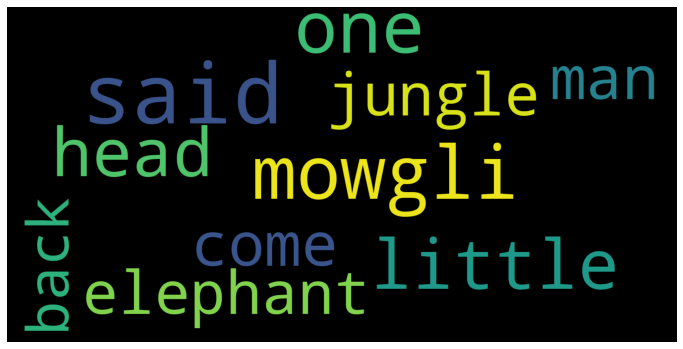

In [0]:
import wordcloud
import nltk
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

class WordCloudGeneration:
    def preprocessing(self, data):
        # Converting all words to lowercase
        data = [item.lower() for item in data]
        # Load the stop_words of english
        stop_words = set(stopwords.words('english'))
        # Concatenate all the data with spaces.
        paragraph = ' '.join(data)
        # Using the inbuilt tokenizer, tokenize the paragraph
        word_tokens = word_tokenize(paragraph) 
        # Filter the words which are present in the stopwords list 
        preprocessed_data = ' '.join([word for word in word_tokens if not word in stop_words])
        print("\n Preprocessed Data: " ,preprocessed_data)
        return preprocessed_data

    def create_word_cloud(self, final_data):
        # Initiate WordCloud object with parameters width, height, maximum font size and background color
        wordcloud = WordCloud(width=1600, height=800, max_words=10, max_font_size=200, background_color="black").generate(final_data)
        # plt the image generated by the WordCloud class
        plt.figure(figsize=(12,10))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

wordcloud_generator = WordCloudGeneration()
import urllib.request
url = "https://www.gutenberg.org/files/236/236-0.txt"
request = urllib.request.Request(url)
response = urllib.request.urlopen(request)
input_text = response.read().decode('utf-8')

input_text = input_text.split('.')
clean_data = wordcloud_generator.preprocessing(input_text)
wordcloud_generator.create_word_cloud(clean_data)